#### By Seth Marceno (8934838), 
###### Group Members: Soo Chan Kim (3903093), Minah Kim (7500879), Elliot Yuen (4195699), Kevin Sandoval (3816402), Indervir Badial(4807137)

# Motivation/Background:
We are going to be doing exploratory analysis using the Black-Scholes equation and Binomial Tree method in order to approximate European and American call/put options on stocks. We will be analyzing the accuracy of the of the Binomial tree in relation to the Black Scholes formula, as well as specify the exercise boundary for American options.

The Black Scholes Model is a pricing model for an options contract. Black-Scholes formula states that the price of call option is $C = S(t)e^{-\delta(T-t)}\Phi(d_+)-Ke^{-r(T-t)}\Phi(d_-)$ and the price of put option is $P = Ke^{-r(T-t)}\Phi(-d_-)-S(t)e^{-\delta(T-t)}\Phi(-d_+)$ where $d_+ = \frac{log(\frac{S(t)}{K})+(r-\delta+\frac{\sigma^2}{2})}{\sigma\sqrt{T-t}}$, $d_- = \frac{log(\frac{S(t)}{K})+(r-\delta-\frac{\sigma^2}{2})}{\sigma\sqrt{T-t}}$ where $S(t)$ is the price at time t, $\delta$ is the dividend rate, T is the maturity, K is the strike price, $\sigma$ is the volatility, and $\Phi(\cdot)$ is the cumulative, standard normal probability distribution function, where $\Phi(x) := \int_{-\infty}^{x} \frac{1}{\sqrt{2\pi}} e^{-\frac{z^2}{2}} dz; x \in \mathbb{R}$.  This model is used to calculate the theoretical value of options. It includes variables such as call option price, current stock price, strike price, interest rate, time to maturity, and underlying volatility. The Black Scholes Model follows the following assumptions: it is a European call option, no dividends are paid out during the life of the option, markets are efficient, there are no transactions costs, risk free rate and volatility are constant, and returns are normally distributed. This model is commonly used by option traders to buy options priced under the theoretical value and sell options priced above it.

A European call option limits its execution to the expiration date, meaning an investor cannot exercise the option early or sell the shares. In contrast, an American call option can be exercised at any time including the expiration date.  

# European Call Option:
We will be approximating the Black Scholes Model with the Call option price at time 0 (expected value) and then perform error analysis. A European call option limits its execution to the expiration date, meaning an investor cannot exercise the option early or sell the shares.  

For this European Call Option model we will be looking at, we will be using the values of $S = 50$, $K = 42$, $r = 0.08$, $\delta = 0.03$, $\sigma = 0.25$, $T = 1$.

Now in order to find the price you should pay for the call option we must solve $C = Se^{-\delta(T-t)}\Phi(d_+)-Ke^{-r(T-t)}\Phi(d_-)$ 

#### a) Solving for d+ and d-

In [6]:
d_plus(50, 42, 0.08, 0.03, 1, 0.25)

1.0224135485791108

In [7]:
d_minus(50, 42, 0.08, 0.03, 1, 0.25)

0.7724135485791109

Thus we have $d_+ = 1.02$ and $d_- = 0.77$

#### b) Using Composite Simpsons to integrate the standard normal curve


In order to find the values $\Phi(d_+)$ and $\Phi(d_-)$ we use Composite Simpsons Quadratures in order to estimate the integral under the standard normal curve.

The standard normal curve is fiven by $f(x) = \frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}}$. Using the error term from the Composite Simpsons formula given in theorem 4.4 we are able to solve for a minimum amount of subintervals $n$ to use in our function. Now, we want our p-values to be within $1.0 x 10^{-5}$

For $d_-$: $h = \frac{.77- -4}{n}$ $.00001 \geq |\frac{\frac{4.77^4}{n^4}}{180}f^{(4)}(\mu)|$
$\Leftrightarrow .00001 \geq |\frac{\frac{4.77^4}{n^4}}{180}(1.196827)| \Leftrightarrow 0.0015039768 \geq \frac{4.77^4}{n^4} \Leftrightarrow n \geq 24.2218 \Rightarrow n = 26$, since n must be even.

For $d_+$: $h = \frac{1.02- -4}{n}$ $.00001 \geq |\frac{\frac{5.02^4}{n^4}}{180}f^{(4)}(\mu)|$
$\Leftrightarrow .00001 \geq |\frac{\frac{5.02^4}{n^4}}{180}(1.196827)| \Leftrightarrow 0.0015039768 \geq \frac{5.02^4}{n^4} \Leftrightarrow n \geq 25.491 \Rightarrow n = 26$.

since we know that n is 26 for both $d_+$ and $d_-$:

In [8]:
phi(0.77, 1.02)

[0.7793218552463883, 0.8461077536658664]

#### c) Solving Black Scholes


thus we see that $\Phi(d_+) = 0.8461$ and $\Phi(d_-) = 0.7793$.

With these restults we can plug it back into the Black Scholes formula and get:

In [9]:
EC(50,0.03,1,0,0.7793,0.8461,42,0.08)

10.840546409727217

Thus we see that a $10.84 premium for a European call option on this specific stock is a fair price. 

#### d) Error Analysis of Black Scholes model vs. Expected Value of a Binomial Tree Aproximation


Now that we have the fair price to pay for a European call option, we will compare this value to the expected value of the call option using a binomial tree approximation. 

In [12]:
exp_value(50, 42, 0.08, 0.03, 0.25, 1, 50)

10.837587754642968

Now finding the relative error:
$e_{rel} = \frac{10.840546409727217-10.837587754642968}{10.840546409727217} = 2.729x10^{-4}$ = .02729% error

Thus we see that the Black-Scholes model is an accurate way to estimate fair European call options.

# American Put Option:

#### a) Finding Stock Movement and American Put Option Boundary Points


An American call option can be exercised at any time including the expiration date. In order to do this we must find the boundary in which to exercise our put option. Since we know from above that the binomial tree is an accurate method to model a stock price movement we will use this to model the change of a stock over time. Then, we will find the corresponding American put option boundary that we will excercise. 

For this we will be using 10 points from the stock price movement.

#### b) Using Natural Cubic Splines to Interpolate Polynomials 

We want to use natural cubic splines in order to interpolate both our American put option boundary as well as the stock movement price because we want to minimize osciallations between points. For the put option boundary, we want to make sure that it is smooth for that very reason. Similarly, we dont want excess movement of the stock prices between the points that we have estimated from the binomial tree. This is because we dont want the stock price and the put option boundary to cross sooner than it otherwise would, so that there is less of a chance for a buyer to exercise their put option too early, and in turn, lose money. 
From using cubic spline interpolation, we are able to ensure that the curve is differentiable along its interval; therefore, Newton's Method is a viable option to solve our zero finding problem, that is, the intersection between the stock movement and the American put option boundary. The time that we find from this solution is the time that a buyer should exercise thier put option in order to maximize their profits. 

Thus using Python to find the coefficients of our polynomials  on the time interval $0 < T< 1$ we get:

###### (i) Stock Movement Spline:
$S_0(x) = 50 - 35.8169x + 12.571x^3$ for $0 \leq x \leq 0.1$

$S_1(x) = 46.4304 - 35.4379(x-0.1) + 3.7713(x-0.1)^2 + 191.9087(x-0.1)^3$ for $0.1 \leq x \leq 0.2$

$S_2(x) = 43.1166 - 28.9277(x-0.2) + 61.3434(x-0.2)^2 - 798.3910(x-0.2)^3$ for $0.2 \leq x \leq 0.3$

$S_3(x) = 40.0389 - 40.6106(x-0.3) - 178.1734(x-0.3)^2 + 2984.7682(x-0.3)^3$ for $0.3 \leq x \leq 0.4$

$S_4(x) = 37.1809 + 13.2978(x-0.4) + 717.2571(x-0.4)^2 - 5241.9228(x-0.4)^3$ for $0.4 \leq x \leq 0.5$

$S_5(x) = 40.4413 - 0.5085(x-0.5) - 855.3198(x-0.5)^2 + 5717.2992(x-0.5)^3$ for $0.5 \leq x \leq 0.6$

$S_6(x) = 37.5546 - 0.0535(x-0.6) + 859.8699(x-0.6)^2 - 5300.1584(x-0.6)^3$ for $0.6 \leq x \leq 0.7$

$S_7(x) = 40.8478 + 12.9157(x-0.7) - 730.1776(x-0.7)^2 + 3094.4392(x-0.7)^3$ for $0.7 \leq x \leq 0.8$

$S_8(x) = 37.9320 - 40.2866(x-0.8) + 198.1541(x-0.8)^2 - 660.5139(x-0.8)^3$ for $0.8 \leq x \leq 0.9$

###### (ii) American Put Option Boundary Spline

$S_0(x) = 42.7410 + 71.2398x + 260.1544x^3$ for $0 \leq x \leq 0.1$

$S_1(x) = 50.1252 + 79.0444(x-0.1) + 78.0463(x-0.1)^2 - 25.0543(x-0.1)^3$ for $0.1 \leq x \leq 0.2$

$S_2(x) = 58.7850 + 93.9021(x-0.2) + 70.5300(x-0.2)^2 + 60.4618(x-0.2)^3$ for $0.2 \leq x \leq 0.3$

$S_3(x) = 68.9409 + 109.8219(x-0.3) + 88.6686(x-0.3)^2 + 41.6829(x-0.3)^3$ for $0.3 \leq x \leq 0.4$

$S_4(x) = 80.8515 + 128.8061(x-0.4) + 101.1734(x-0.4)^2 + 75.9377(x-0.4)^3$ for $0.4 \leq x \leq 0.5$

$S_5(x) = 94.8198 + 151.3189(x-0.5) + 123.9548(x-0.5)^2 + 10.0679(x-0.5)^3$ for $0.5 \leq x \leq 0.6$

$S_6(x) = 111.2013 + 176.4119(x-0.6) + 126.9751(x-0.6)^2 + 300.7105(x-0.6)^3$ for $0.6 \leq x \leq 0.7$

$S_7(x) = 130.4129 + 210.8283(x-0.7) +217.1883(x-0.7)^2 - 723.9610(x-0.7)^3$ for $0.7 \leq x \leq 0.8$

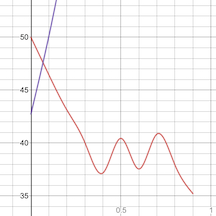

In [2]:
from IPython.display import Image
Image(filename='desmos-graph.png')

Thus we can see that the Put option boundary and the stock movement cross on the interval $[0, 0.1]$. 

#### c) Using Zero Finding to Find Time to Excercise Put Option

Since we know the interval in which these graphs cross, we know we need to solve the equation: $50 - 35.8169x + 12.571x^3 = 42.7410 + 71.2398x + 260.1544x^3 \Leftrightarrow 247.5834x^3 + 107.0567x - 7.259 = 0$

Because a cubic function is continuos and differentiable, we can use Newtons method in order to approximate this zero. Using a tolerance of .0001 we find:

In [3]:
f = lambda x:((247.5834*(x**3)) + (107.0567*x) - (7.259))
f_prime = lambda x:((742.7502*(x**2)) + (107.0567))
NewtonsMethod(f, f_prime, 0, .0001, 20)

(0.06710631864086859, 'found after ', 3, ' iterations')

Therefore we see that at time 0.0671 you would want to excerice your put option so that you can make the most money. 

# Results

When finding the price for the European call option we modeled we found that the relative error of the binomial tree approximation of the "true" call option price found using the Black-Scholes formula was about 0.02729%. Thus, we found that the binomial tree approximation of stock prices was a viable option to model these call prices. Using this fact we are able to look at American put options, which can be exercised at any point including the maturity date. Thus, using a binomial tree we are able to model the movement of stock prices. Once we had found points for the stock model and the values in which to exercise the put option using natural cubic spline interpolation we used zero finding to find that we should exercise our put option at t = 0.0671. Since T = 1 represents a period of 1 year, we find that we should exercise our put option after about 25 days in order to maximize our profits.